# Establish Connection with G-Drive

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd drive/My Drive/NBR

/content/drive/My Drive/NBR


# Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import os
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Read Datasets

In [ ]:
dfs = {}
dfs['orders.csv'] = pd.read_csv('orders.csv')
dfs['order_products__train.csv'] = pd.read_csv('order_products__train.csv')
dfs['products.csv'] = pd.read_csv('products.csv')
dfs['aisles.csv'] = pd.read_csv('aisles.csv')
dfs['departments.csv'] = pd.read_csv('departments.csv')

dfs = dict(sorted(dfs.items()))
df_names = list(dfs.keys())
df_names

['aisles.csv',
 'departments.csv',
 'order_products__train.csv',
 'orders.csv',
 'products.csv']

In [ ]:
for itr in df_names:
    print(itr)
    print(dfs[itr])
    print("\n")

aisles.csv
     aisle_id                       aisle
0           1       prepared soups salads
1           2           specialty cheeses
2           3         energy granola bars
3           4               instant foods
4           5  marinades meat preparation
..        ...                         ...
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes

[134 rows x 2 columns]


departments.csv
    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     m

# Data Integration
Merge all the datasets into one table

In [ ]:
df1 = dfs[df_names[2]]
df2 = df1.merge(dfs[df_names[4]], on='product_id')
df3 = df2.merge(dfs[df_names[0]], on='aisle_id')
df4 = df3.merge(dfs[df_names[3]], on='order_id')
df5 = df4.merge(dfs[df_names[1]], on='department_id')
df = df5

In [ ]:
df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,112108,train,4,4,10,9.0,dairy eggs
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,112108,train,4,4,10,9.0,dairy eggs
2,1,22035,8,1,Organic Whole String Cheese,21,16,packaged cheese,112108,train,4,4,10,9.0,dairy eggs
3,816049,49302,7,1,Bulgarian Yogurt,120,16,yogurt,47901,train,14,4,6,16.0,dairy eggs
4,816049,35176,5,1,Cream Cheese Cream Cheese Spread,108,16,other creams cheeses,47901,train,14,4,6,16.0,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,2203844,44218,1,0,Duct Tape,6,2,other,109269,train,11,3,14,30.0,other
1384613,2221946,3994,1,0,Max Bed Bug and Flea Killer,6,2,other,24500,train,9,0,9,10.0,other
1384614,2417998,39511,2,0,Baby Diaper Rash Ointment,6,2,other,151951,train,12,0,12,20.0,other
1384615,2462087,19109,1,0,Antifungal Clotrimazole Cream,6,2,other,168591,train,5,1,20,30.0,other


# Exploratory Data Analysis
derive useful insights from the dataset

## Group orders by products and get how many times each product was ordered

In [ ]:
g = df.product_id.value_counts()
g = pd.DataFrame(g)
g.reset_index(inplace=True)
g.columns = ["product_id", "count"]
g_products = g.merge(dfs['products.csv'], on="product_id")
g_products.head()

,product_id,count,product_name,aisle_id,department_id
0,24852,18726,Banana,24,4
1,13176,15480,Bag of Organic Bananas,24,4
2,21137,10894,Organic Strawberries,24,4
3,21903,9784,Organic Baby Spinach,123,4
4,47626,8135,Large Lemon,24,4


<Figure size 2880x2160 with 0 Axes>

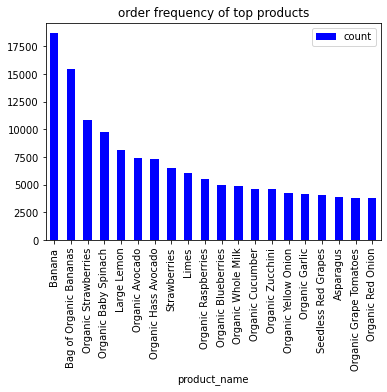

In [ ]:
plt.figure(figsize=(40, 30))
g_products.head(20).plot(kind="bar", x="product_name", y="count", color = 'blue')
plt.title('order frequency of top products')
plt.show()

## number of orders per department

In [ ]:
g = df.department_id.value_counts()
g = pd.DataFrame(g)
g.reset_index(inplace=True)
g.columns = ["department_id", "count"]
g_dept = g.merge(dfs['departments.csv'], on="department_id")
g_dept.head()

,department_id,count,department
0,4,409087,produce
1,16,217051,dairy eggs
2,19,118862,snacks
3,7,114046,beverages
4,1,100426,frozen


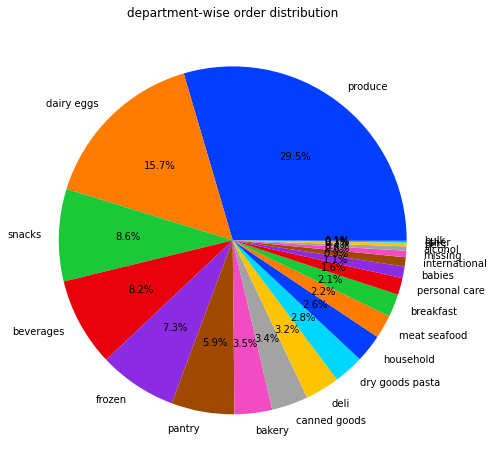

In [ ]:
plt.figure(figsize=(12,8))
palette_color = sns.color_palette('bright')
plt.pie(g_dept['count'], labels=g_dept['department'], colors=palette_color, autopct='%1.1f%%')
plt.title('department-wise order distribution')
plt.show()

## frequency of orders on week days

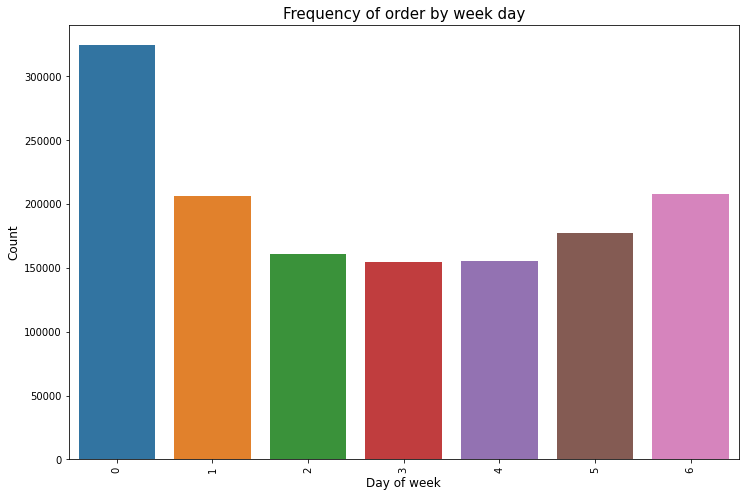

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='order_dow', data=df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

## frequency of orders for hours of the day

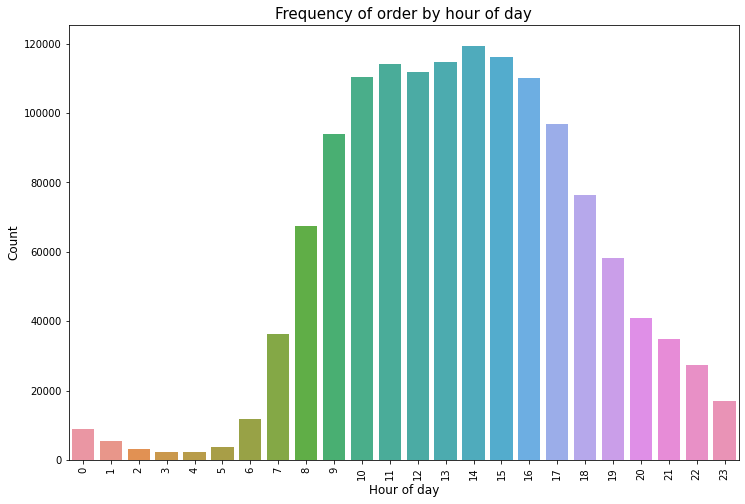

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

## Visualization of ratio of Re-ordered and Not Re-ordered product

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


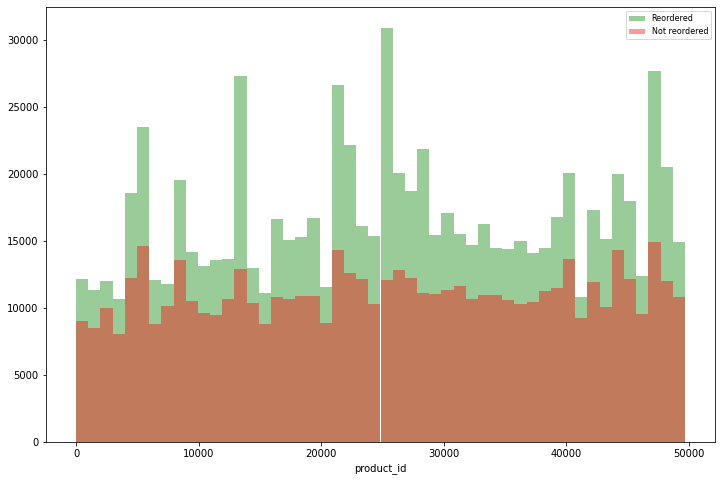

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(df[df['reordered'] == 1]['product_id'], kde=False, label='Reordered', color = 'green')
sns.distplot(df[df['reordered'] == 0]['product_id'], kde=False, label='Not reordered', color = 'red')
plt.legend(prop={'size': 8})
plt.show()

## heatmap of Re-ordered ratio of week vs Hour of day

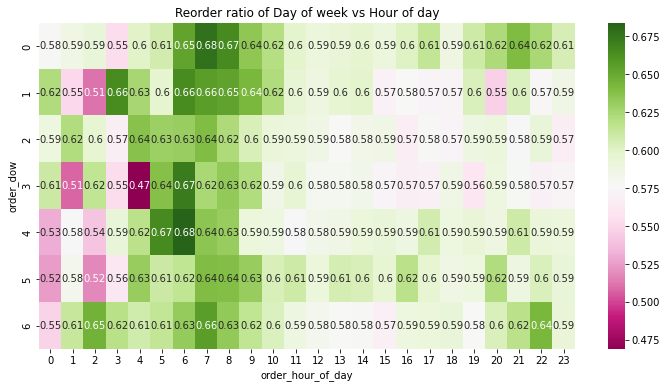

In [ ]:
grouped_df = df.groupby(['order_dow', 'order_hour_of_day'])['reordered'].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'reordered')

plt.figure(figsize=(12, 6))
sns.heatmap(grouped_df, annot=True, cmap='PiYG')
plt.title("Reorder ratio of Day of week vs Hour of day")
plt.show()

# Create a Basket
As the dataset contains huge amout of data, let's take a frequent-item subset of the data to extract the association rules from it. We consider the 100 most frequent ordered items.

In [ ]:
product_counts = df.groupby('product_id')['order_id'].count().reset_index().rename(columns = {'order_id':'frequency'})
product_counts = product_counts.sort_values('frequency', ascending=False)[0:100].reset_index(drop=True)
product_counts.head(10)

,product_id,frequency
0,24852,18726
1,13176,15480
2,21137,10894
3,21903,9784
4,47626,8135
5,47766,7409
6,47209,7293
7,16797,6494
8,26209,6033
9,27966,5546


In [ ]:
freq_products = list(product_counts.product_id)
freq_products

[24852,
 13176,
 21137,
 21903,
 47626,
 47766,
 47209,
 16797,
 26209,
 27966,
 39275,
 27845,
 30391,
 45007,
 22935,
 24964,
 4920,
 46979,
 40706,
 8518,
 4605,
 42265,
 45066,
 31717,
 5876,
 44632,
 43352,
 28204,
 5450,
 8424,
 21616,
 24184,
 19057,
 30489,
 26604,
 37646,
 27104,
 49235,
 28985,
 44359,
 48679,
 41950,
 21938,
 17794,
 43961,
 27086,
 49683,
 34126,
 10749,
 39877,
 37067,
 9076,
 5077,
 12341,
 8277,
 34969,
 19660,
 35951,
 24838,
 25890,
 31506,
 46667,
 22035,
 8174,
 35221,
 29487,
 34358,
 28842,
 20114,
 11520,
 22825,
 39928,
 15290,
 33198,
 27344,
 18465,
 27521,
 16759,
 33731,
 9839,
 38739,
 27156,
 23909,
 5785,
 46906,
 196,
 11777,
 28199,
 33000,
 44142,
 47144,
 40604,
 5025,
 42736,
 21709,
 8193,
 9387,
 37687,
 20995,
 34243]

In [ ]:
order_products = df[df.product_id.isin(freq_products)]
order_products.shape

(314227, 15)

In [ ]:
basket = order_products.pivot_table(columns='product_name', values='reordered', 
                                    index='order_id').reset_index().fillna(0).set_index('order_id')

In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
basket = basket.applymap(encode_units)
basket.head()

product_name,100% Whole Wheat Bread,2% Reduced Fat Milk,Apple Honeycrisp Organic,Asparagus,Bag of Organic Bananas,Banana,Blueberries,Boneless Skinless Chicken Breasts,Broccoli Crown,Bunched Cilantro,...,Sparkling Lemon Water,Sparkling Natural Mineral Water,Sparkling Water Grapefruit,Spring Water,Strawberries,Uncured Genoa Salami,Unsalted Butter,Unsweetened Almondmilk,Unsweetened Original Almond Breeze Almond Milk,Yellow Onions
order_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Apriori Algorithm
As the dataset contains huge amount of data, let us take a subset of the data to extract the association rules from it. Segment the basket by considering 100000 record. 

In [ ]:
shortbasket = basket[:100000]

In [ ]:
frequent_items = apriori(shortbasket, min_support=0.01, use_colnames=True)
frequent_items.head()

,support,itemsets
0,0.018668,(100% Whole Wheat Bread)
1,0.013298,(2% Reduced Fat Milk)
2,0.017304,(Apple Honeycrisp Organic)
3,0.026180,(Asparagus)
4,0.142376,(Bag of Organic Bananas)


In [ ]:
rules = association_rules(frequent_items, metric='lift', min_threshold=1)
rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(Limes),(Large Lemon),0.045115,0.063111,0.010325,0.228862,3.626315,0.007478,1.214942
18,(Large Lemon),(Limes),0.063111,0.045115,0.010325,0.163600,3.626315,0.007478,1.141661
30,(Organic Strawberries),(Organic Raspberries),0.091668,0.045594,0.013074,0.142625,3.128143,0.008895,1.113172
31,(Organic Raspberries),(Organic Strawberries),0.045594,0.091668,0.013074,0.286749,3.128143,0.008895,1.273511
21,(Organic Avocado),(Large Lemon),0.066340,0.063111,0.010293,0.155156,2.458445,0.006106,1.108948
20,(Large Lemon),(Organic Avocado),0.063111,0.066340,0.010293,0.163093,2.458445,0.006106,1.115608
3,(Organic Hass Avocado),(Bag of Organic Bananas),0.064379,0.142376,0.021449,0.333168,2.340054,0.012283,1.286117
2,(Bag of Organic Bananas),(Organic Hass Avocado),0.142376,0.064379,0.021449,0.150651,2.340054,0.012283,1.101574
4,(Bag of Organic Bananas),(Organic Raspberries),0.142376,0.045594,0.014811,0.104026,2.281578,0.008319,1.065217
5,(Organic Raspberries),(Bag of Organic Bananas),0.045594,0.142376,0.014811,0.324842,2.281578,0.008319,1.270257
